In [33]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
import os

# Download latest version
path = kagglehub.dataset_download("anshtanwar/jellyfish-types")

print("Path to dataset files:", path)

classes = []
paths = []
for dirname, _, filenames in os.walk(path):
    # Train_Test_Valid 폴더 제외
    if 'Train_Test_Valid' in dirname:
        continue
    for filename in filenames:
        if not filename.endswith('.txt'):
            class_name = dirname.split('/')[-1]
            # 루트 디렉토리 제외
            if class_name != 'jellyfish-types':
                classes.append(class_name)
                paths.append(os.path.join(dirname, filename))

Path to dataset files: /root/.cache/kagglehub/datasets/anshtanwar/jellyfish-types/versions/16


In [34]:
N=list(range(len(classes)))
class_names=sorted(set(classes))
print(class_names)
normal_mapping=dict(zip(class_names,N))
reverse_mapping=dict(zip(N,class_names))

data=pd.DataFrame(columns=['path','class','label'])
data['path']=paths
data['class']=classes
data['label']=data['class'].map(normal_mapping)
print(len(data))

['Moon_jellyfish', 'barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish', 'lions_mane_jellyfish', 'mauve_stinger_jellyfish']
900


In [35]:
# 1. 데이터 기본 정보 확인
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    900 non-null    object
 1   class   900 non-null    object
 2   label   900 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.2+ KB
None
            label
count  900.000000
mean     2.500000
std      1.708775
min      0.000000
25%      1.000000
50%      2.500000
75%      4.000000
max      5.000000


In [37]:
# 2. 랜덤 샘플 출력
print("\nRandom Sample of 5 Rows:")
print(data.sample(5))


Random Sample of 5 Rows:
                                                  path  \
727  /root/.cache/kagglehub/datasets/anshtanwar/jel...   
216  /root/.cache/kagglehub/datasets/anshtanwar/jel...   
611  /root/.cache/kagglehub/datasets/anshtanwar/jel...   
690  /root/.cache/kagglehub/datasets/anshtanwar/jel...   
383  /root/.cache/kagglehub/datasets/anshtanwar/jel...   

                       class  label  
727     lions_mane_jellyfish      4  
216  mauve_stinger_jellyfish      5  
611     lions_mane_jellyfish      4  
690     lions_mane_jellyfish      4  
383           blue_jellyfish      2  


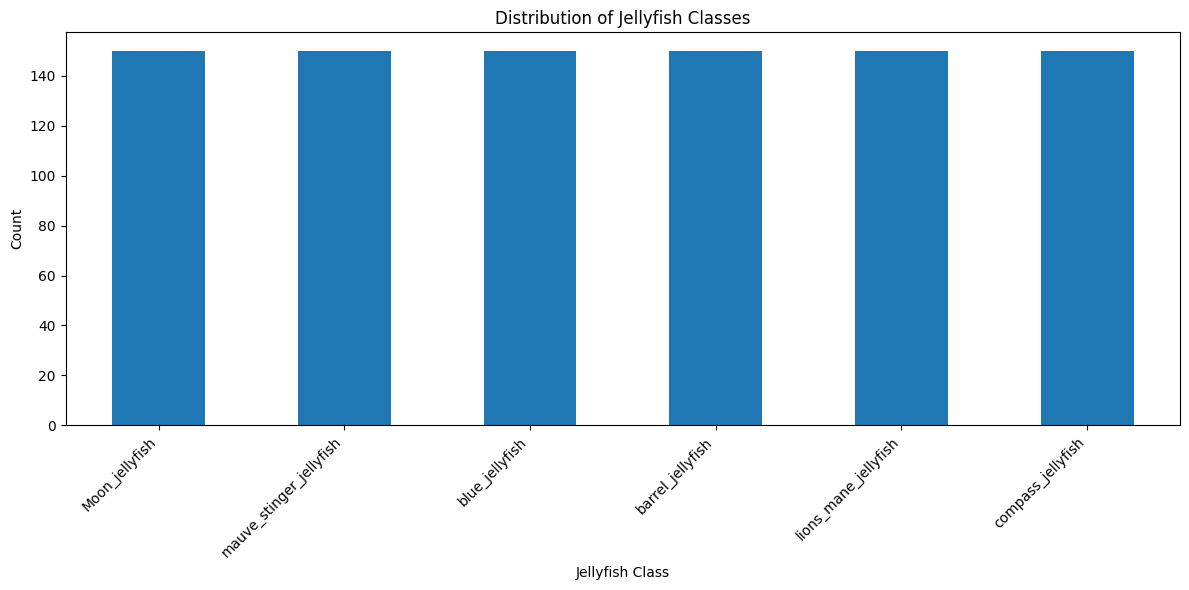

In [38]:
# 3. 클래스 분포 시각화
plt.figure(figsize=(12, 6))
data['class'].value_counts().plot(kind='bar')
plt.title('Distribution of Jellyfish Classes')
plt.xlabel('Jellyfish Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [39]:
# 4. 클래스별 이미지 수 출력
class_counts = data['class'].value_counts()
print("Number of images per class:")
print(class_counts)

Number of images per class:
class
Moon_jellyfish             150
mauve_stinger_jellyfish    150
blue_jellyfish             150
barrel_jellyfish           150
lions_mane_jellyfish       150
compass_jellyfish          150
Name: count, dtype: int64


In [40]:
# 5. 클래스와 레이블 매핑 확인
print("\nClass to Label Mapping:")
for class_name, label in normal_mapping.items():
    print(f"{class_name}: {label}")


Class to Label Mapping:
Moon_jellyfish: 0
barrel_jellyfish: 1
blue_jellyfish: 2
compass_jellyfish: 3
lions_mane_jellyfish: 4
mauve_stinger_jellyfish: 5


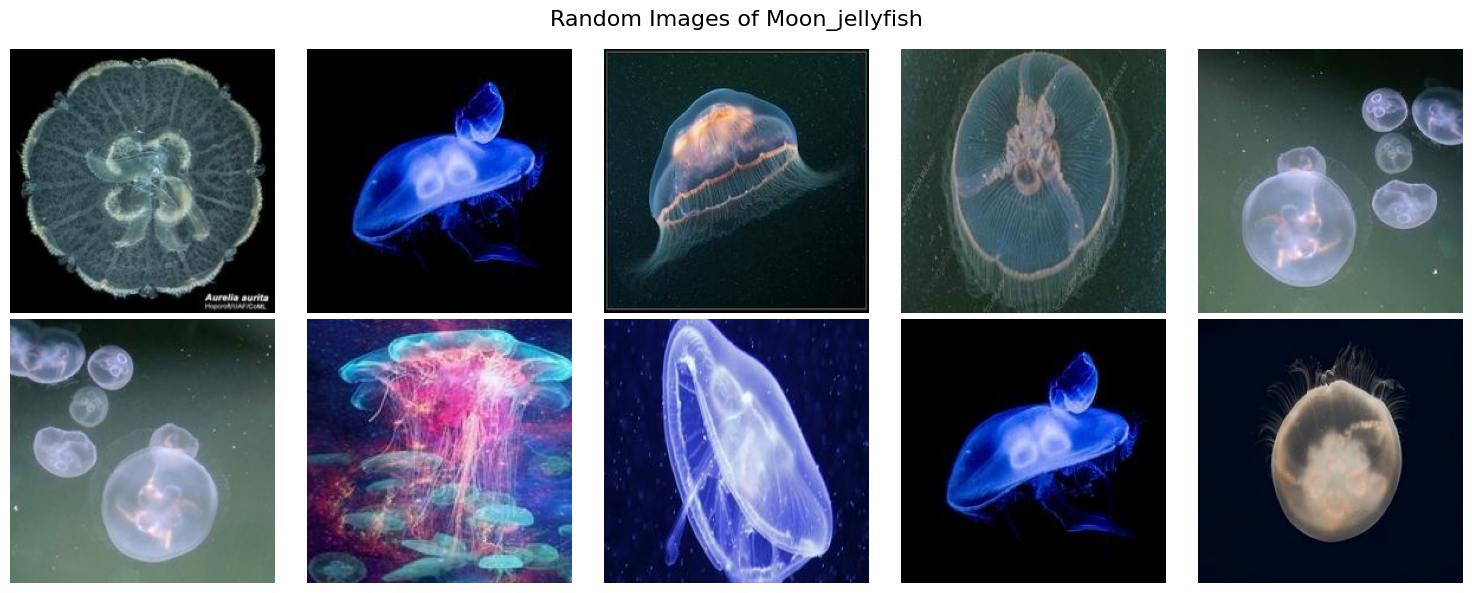

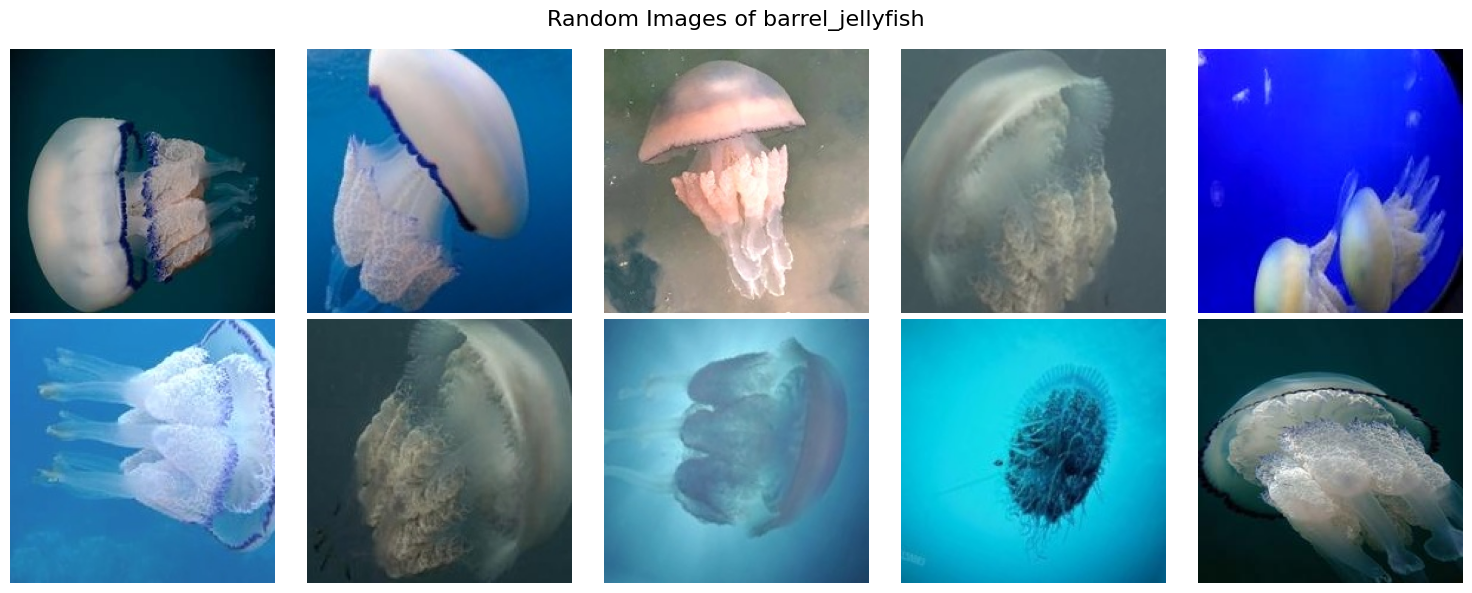

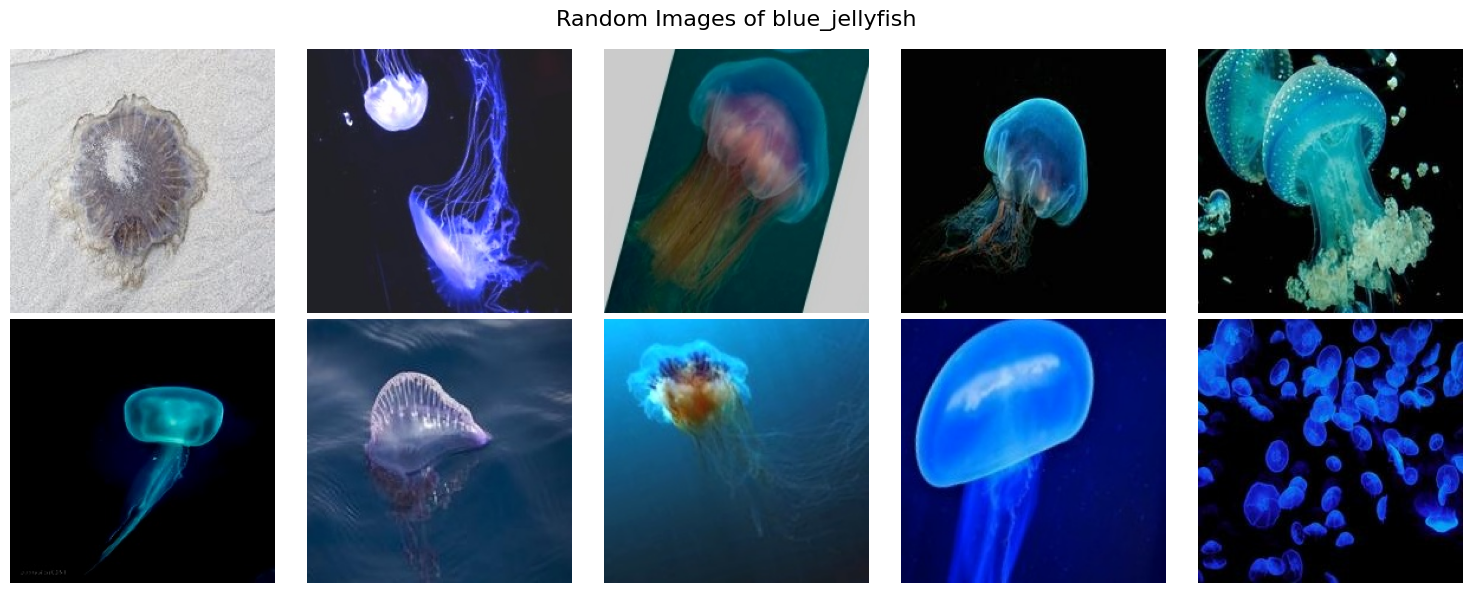

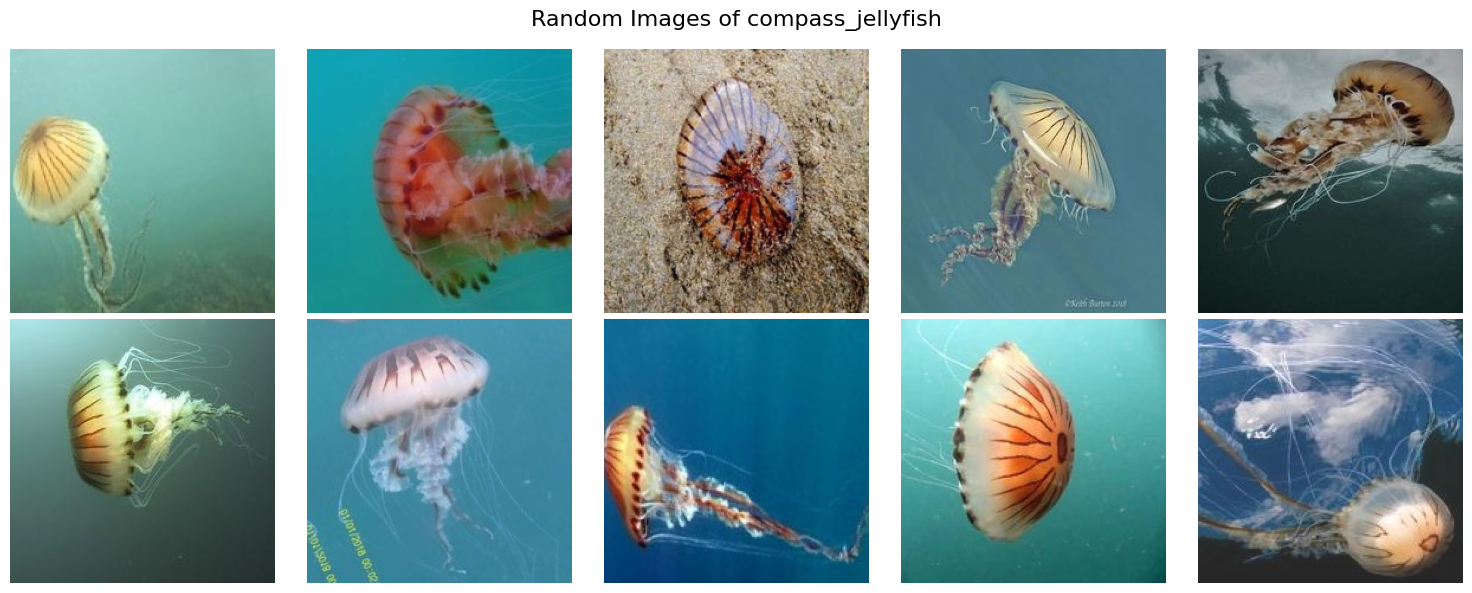

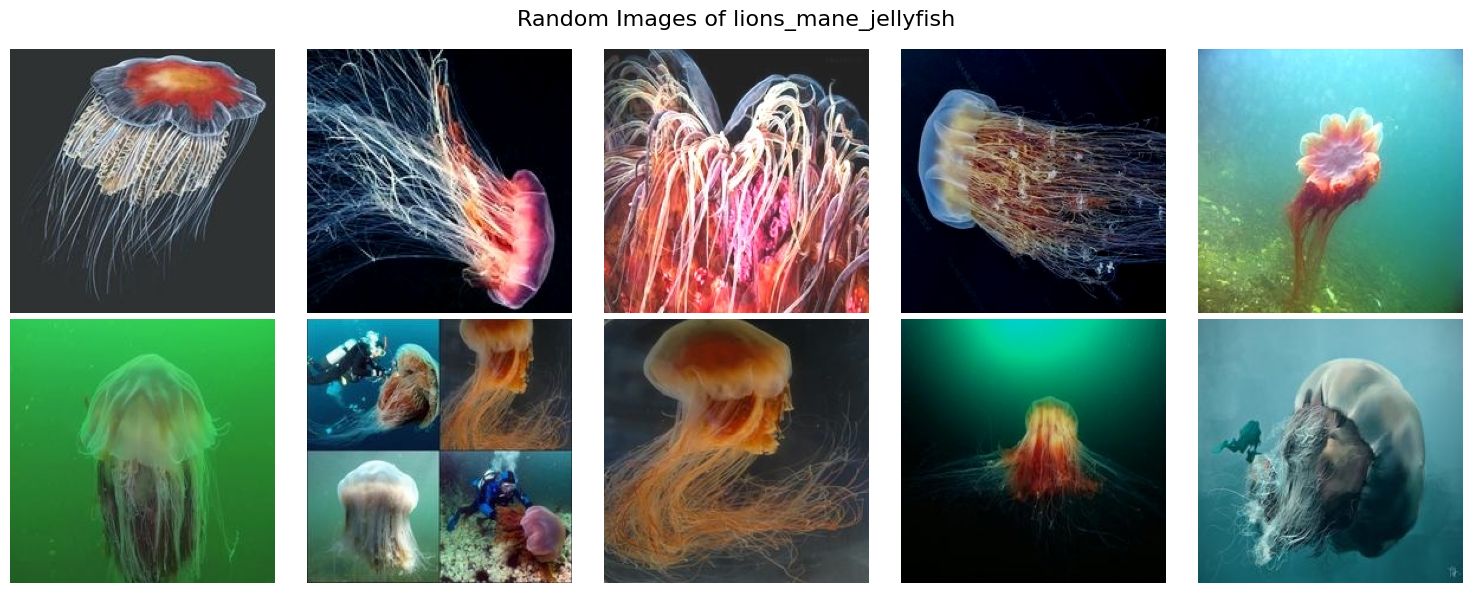

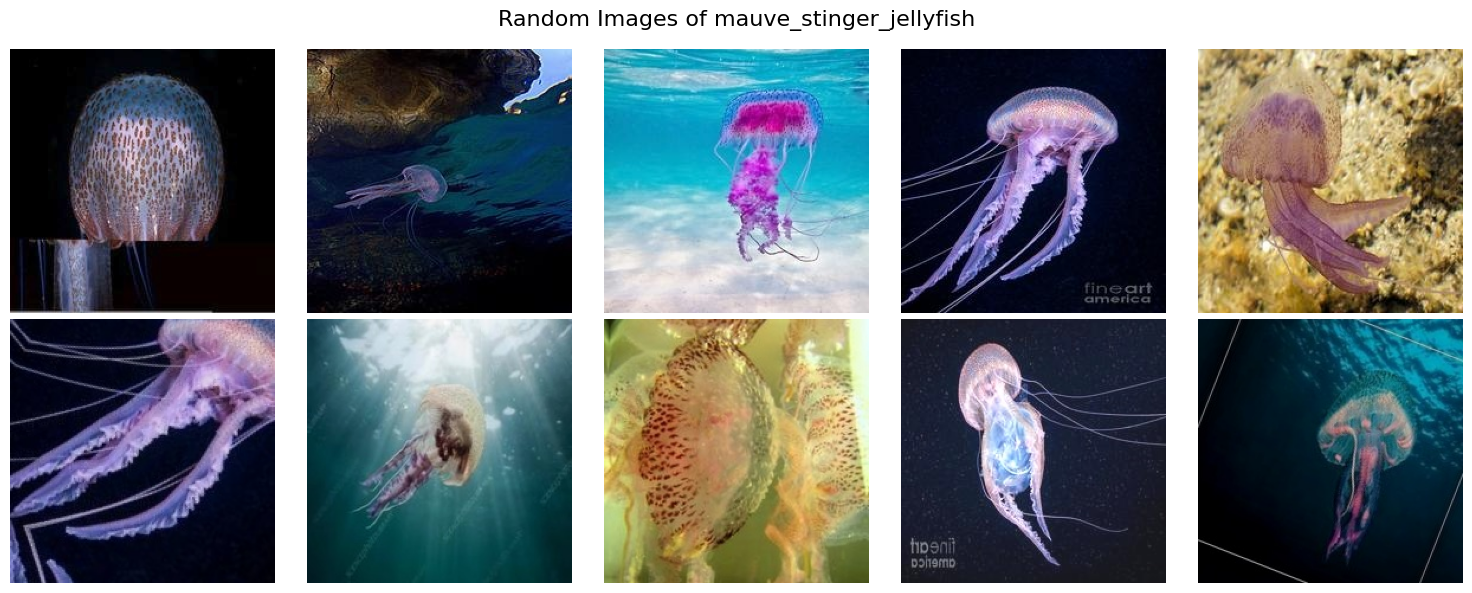

In [41]:
# 6. 각 클래스별 랜덤한 10개 이미지 시각화
def plot_random_images(data, class_name, num_images=10):
    class_images = data[data['class'] == class_name]['path'].tolist()
    selected_images = random.sample(class_images, min(num_images, len(class_images)))

    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle(f'Random Images of {class_name}', fontsize=16)

    for i, ax in enumerate(axes.flat):
        if i < len(selected_images):
            img = Image.open(selected_images[i])
            ax.imshow(img)
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# 각 클래스에 대해 랜덤 이미지 플롯
for class_name in class_names:
    plot_random_images(data, class_name)

# 해파리 이미지 데이터셋 EDA

## 1. 데이터셋 개요

- **총 이미지 수**: 900
- **클래스 수**: 6

## 2. 클래스 분포

| 클래스 | 이미지 수 | 비율 |
|--------|-----------|------|
| lions_mane_jellyfish | 150 | 16.67% |
| mauve_stinger_jellyfish | 150 | 16.67% |
| blue_jellyfish | 150 | 16.67% |
| compass_jellyfish | 150 | 16.67% |
| Moon_jellyfish | 150 | 16.67% |
| barrel_jellyfish | 150 | 16.67% |

## 3. 클래스-레이블 매핑

| 클래스 | 레이블 |
|--------|--------|
| Moon_jellyfish | 0 |
| barrel_jellyfish | 1 |
| blue_jellyfish | 2 |
| compass_jellyfish | 3 |
| lions_mane_jellyfish | 4 |
| mauve_stinger_jellyfish | 5 |

## 4. 데이터 라벨링 이슈

### 4.1 해변 사진 문제점
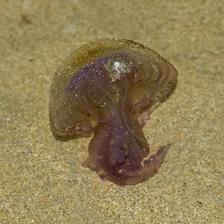
- 해변에서 해파리들의 모양이 비슷해짐
- 해변 색에 맞춰 해파리 색 변형
- 해파리가 눌려 원래 모양 손실

### 4.2 다중 종 포함 이슈
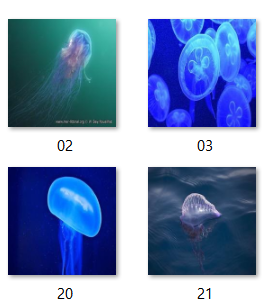

- **주요 문제**: Blue 클래스에 다른 종 해파리 포함
- 한 이미지에 여러 종류의 해파리 존재

### 4.3 데이터 증강 문제
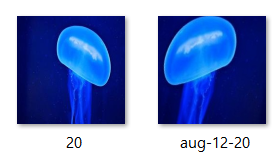
- 데이터셋에 이미 증강된 이미지 존재
- 원본 이미지와 증강 이미지 혼재

### 4.4 부가 요소 포함 이미지
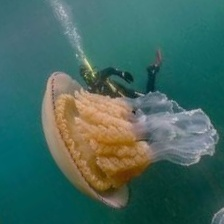
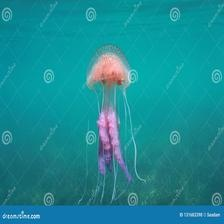
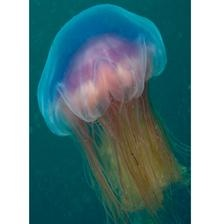
- 워터마크가 있는 이미지
- 텍스트가 포함된 이미지
- 사람이 함께 찍힌 이미지
- 인위적인 흰 배경 이미지

## 5. 데이터 정제 전략

### 5.1 이미지 제거 기준

1. 해변 배경 이미지 제거
2. 다중 종 포함 이미지 제거
3. 증강된 데이터 제거
4. 워터마크/텍스트/사람 포함 이미지 제거

### 5.2 기대 효과

- 데이터셋 품질 향상
- 모델 학습의 정확도 개선
- 해파리 클래스의 순수성 확보

## 6. 향후 계획

- 정제 기준에 따른 이미지 선별
- 제거된 이미지 수와 비율 분석
- 클래스별 이미지 재분포 확인
- 데이터 증강 기법 적용
- 정제된 데이터셋으로 모델 성능 평가

# 해파리 이미지 데이터셋 EDA 결과 (정제 후)

## 1. 데이터셋 개요

- **원본 총 이미지 수**: 900
- **정제 후 총 이미지 수**: 222
- **클래스 수**: 6

## 2. 클래스 분포 (정제 후)

| 클래스 | 이미지 수 | 비율 |
|--------|-----------|------|
| lions_mane_jellyfish | 54 | 24.32% |
| mauve_stinger_jellyfish | 48 | 21.62% |
| compass_jellyfish | 41 | 18.47% |
| Moon_jellyfish | 41 | 18.47% |
| barrel_jellyfish | 30 | 13.51% |
| blue_jellyfish | 8 | 3.60% |

## 3. 클래스-레이블 매핑 (변경 없음)

| 클래스 | 레이블 |
|--------|--------|
| Moon_jellyfish | 0 |
| barrel_jellyfish | 1 |
| blue_jellyfish | 2 |
| compass_jellyfish | 3 |
| lions_mane_jellyfish | 4 |
| mauve_stinger_jellyfish | 5 |

## 4. 데이터 정제 결과

- **제거된 이미지 수**: 678 (75.33% 감소)
- **남은 이미지 수**: 222 (24.67% 유지)

### 4.1 클래스별 제거 비율

| 클래스 | 원본 수 | 정제 후 수 | 제거 비율 |
|--------|---------|------------|-----------|
| lions_mane_jellyfish | 150 | 54 | 64.00% |
| mauve_stinger_jellyfish | 150 | 48 | 68.00% |
| blue_jellyfish | 150 | 8 | 94.67% |
| compass_jellyfish | 150 | 41 | 72.67% |
| Moon_jellyfish | 150 | 41 | 72.67% |
| barrel_jellyfish | 150 | 30 | 80.00% |

## 5. 데이터 정제 후 이슈

- **blue_jellyfish 클래스의 심각한 데이터 부족**:
  - 정제 후 8개로 가장 적은 이미지 수 보유
  - 다른 클래스와의 불균형 심화

## 6. 추가 개선 계획

1. **blue_jellyfish 클래스 데이터 보강**:
   - 목표: 최소 80개까지 이미지 수 증가
   - 방법: 추가 데이터 수집

2. 지속적인 데이터셋 개선:
   - 모델 성능에 따른 추가 데이터 수집 필요성 평가
   - 정기적인 데이터셋 품질 검토 및 업데이트 계획 수립